In [3]:
import sys
print(sys.executable)

C:\Users\91916\anaconda3\python.exe


# Importing libraries

In [23]:
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import math
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91916\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91916\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Preprocessing

In [62]:
#reading text from the books
T1= open("C:\\Users\\91916\\Desktop\\Animal Life in Field and Garden.txt",encoding="utf-8").read()

T2=open("C:\\Users\\91916\\Desktop\\DAVID VALLORY.txt",encoding="utf-8").read()

In [70]:
#remove unneccesary text
def remove_text(text):
    text = re.sub(r'\*\*\* START OF THE PROJECT ([\s\S]*?)\*\*\*', ' ', text)
    text = re.sub(r'\n\*\*\* END OF THE PROJECT ([\s\S]*)',' ',text)
    text = re.sub(r'\n+CHAPTER.*\n\n.*\n+','\n\n', text)
    text = re.sub(r'\n+^M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})$\n.*\n','\n\n', text)
    return text

In [72]:
T1=remove_text(T1)
T2= remove_text(T2)


In [73]:
# convert all text to lower case and removing any link
def to_lower(text):
    text = text.lower()
    re.sub(r"http\S+", "\n", text)
    return text

In [75]:
#convert short forms to full forms
def convert(text):
    
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [77]:
T1 =to_lower(T1)
T2=to_lower(T2)
T1 = convert(T1)
T2= convert(T2)

In [78]:
#removing punctuation
T1=re.sub(r'[^\w\s]','',T1)
T2=re.sub(r'[^\w\s]','',T2)

# Tokenisation

In [79]:
from nltk.tokenize import word_tokenize

# splitting text into individual tokens(words)
def tokenize_word(text):
    words = word_tokenize(text)
    return words

In [80]:
words_T1=tokenize_word(T1)
words_T2=tokenize_word(T2)

# Frequncy Analysis

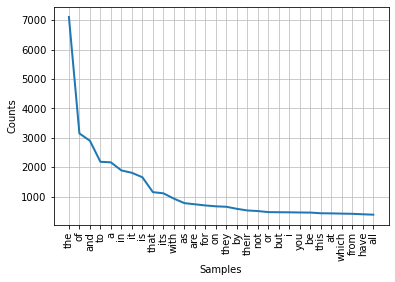

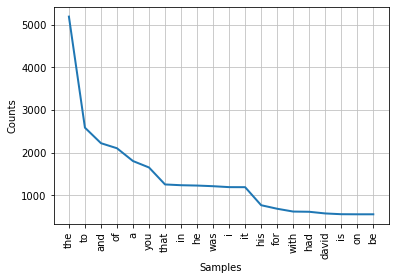

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [81]:
# analyzing frequency of words before removing stop words
frequency_words_T1 = nltk.FreqDist(words_T1)
frequency_words_T1.plot(30, cumulative=False)
frequency_words_T2 = nltk.FreqDist(words_T2)
frequency_words_T2.plot(20, cumulative=False)

# Word Cloud

In [82]:
def stringConverter(s):       
    finstr = " "      
    return (finstr.join(s))
        
# converting LIST OF TOKENS to a string 
def tokens_to_string(words):       
    text = stringConverter(words)
    return text 

In [84]:
text_T1 = tokens_to_string(words_T1)
text_T2 = tokens_to_string(words_T2)

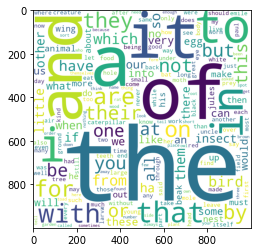

In [86]:
# word cloud for T1
wc_T1 = WordCloud(background_color="white", width=1000, height=1000, random_state=1,stopwords= [],collocations=False).generate(text_T1)
plt.imshow(wc_T1)

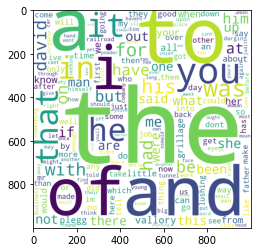

In [87]:
#word cloud for T2
wc_T2 = WordCloud(background_color="white", width=1000, height=1000, random_state=1,stopwords= [],collocations=False).generate(text_T2)
plt.imshow(wc_T2)

In [88]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91916\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [89]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [90]:
# remove stopwords printed above
def remove_stopwords(words):
    words = [w for w in words if w not in stopwords.words("english")]
    return words

In [91]:
nsw_words_T1 = remove_stopwords(words_T1)
nsw_words_T2 =remove_stopwords(words_T2)

# Word Cloud After removing Stopwords

In [92]:
nsw_text_T1 = tokens_to_string(nsw_words_T1)
nsw_text_T2 = tokens_to_string(nsw_words_T2)

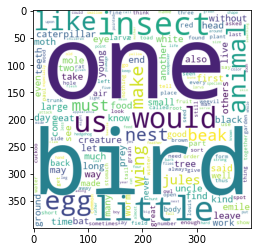

In [93]:
# word cloud for T1 after removing stopwords
wc_nsw_T1 = WordCloud(background_color="white", width=400, height=400, random_state=1,stopwords= [],collocations=False).generate(nsw_text_T1)
plt.imshow(wc_nsw_T1)

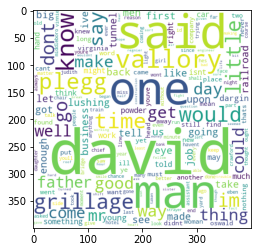

In [94]:
# word cloud for T2 after removing stopwords
wc_nsw_T2 = WordCloud(background_color="white", width=400, height=400, random_state=1,stopwords= [],collocations=False).generate(nsw_text_T2)
plt.imshow(wc_nsw_T2)

# Frequency analysis after removing stopwords

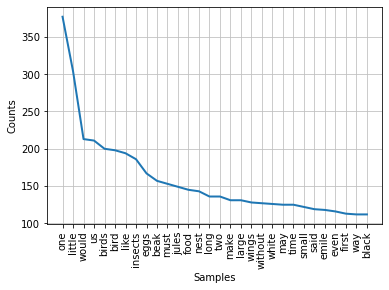

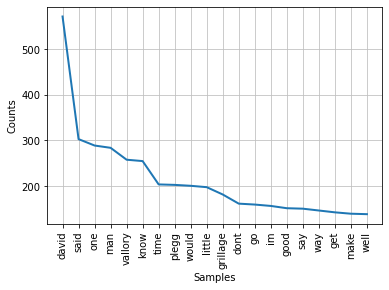

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [95]:
# analyzing frequency for T1 and T2 respectively
frequency_nsw_T1 = nltk.FreqDist(nsw_words_T1)
frequency_nsw_T1.plot(30, cumulative=False)

frequency_nsw_T2 = nltk.FreqDist(nsw_words_T2)
frequency_nsw_T2.plot(20, cumulative=False)

# Word Length to frequency

In [111]:
def wordlength_to_frequency(words):
    frequency_of_words = []
    length_of_words=[]
    frequency_of_words.clear()
    length_of_words.clear()
    # finding the largest word in list.
    res = max(words, key = len)
    i=0
    frequency=0
    # calculating frequency of differenct length of words, appending them in respective positions.
    while(i<=len(res)):
        for word in words:
            if(len(word)==i):
                frequency= frequency+1
        frequency_of_words.append(frequency)
        length_of_words.append(i)
        frequency=0
        i=i+1

    # plotting graph of frequency_of_words to length_of_words.
    y = np.array(frequency_of_words)
    x = np.array(length_of_words)
    plt.plot(x, y)
    fin_list = range(math.floor(min(x)), math.ceil(max(x))+1)
    plt.xticks(fin_list)
    plt.xlabel("Length of word")
    plt.ylabel("Frequency of words")
    plt.title("Length of word to Frequency of words")
    plt.show()

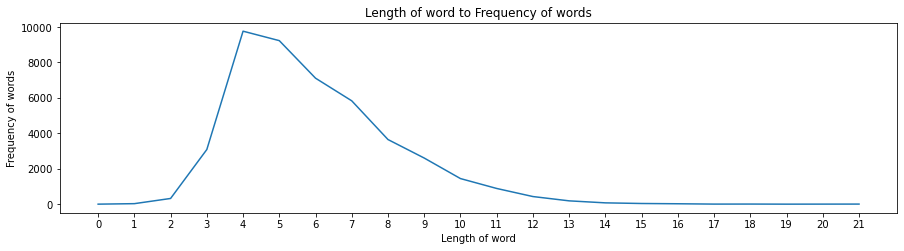

In [112]:
wordlength_to_frequency(nsw_words_T1)

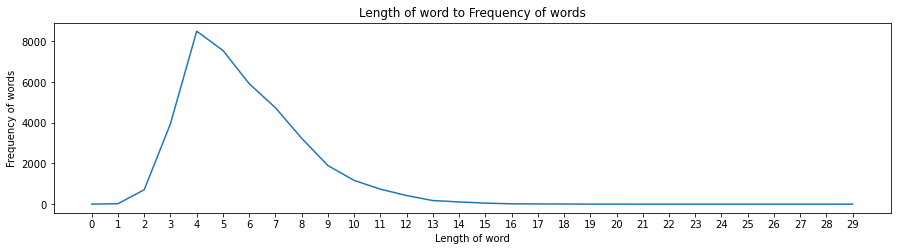

In [113]:
wordlength_to_frequency(nsw_words_T2)

# POS tagging

In [96]:
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91916\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\91916\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.


True

In [100]:
# POS tagging the words
res1=nltk.pos_tag(nsw_words_T1)
res2=nltk.pos_tag(nsw_words_T2)
from collections import Counter
def get_count(tags):
  counts_tags = Counter(tag for word,tag in tags)
  return counts_tags
def FrequencyPlot(dist):
  plt.rcParams["figure.figsize"] = [15, 3.50]
  plt.bar(dist.keys(),dist.values())
  plt.show()

Number of tags used in T1= 29


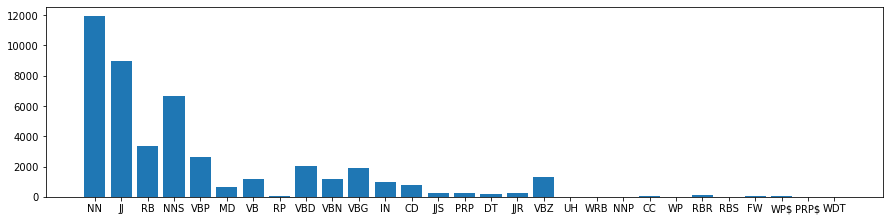

In [102]:
dist1=get_count(res1)
print("Number of tags used in T1=",len(dist1))
dist1
FrequencyPlot(dist1)

Number of tags used in T2= 32


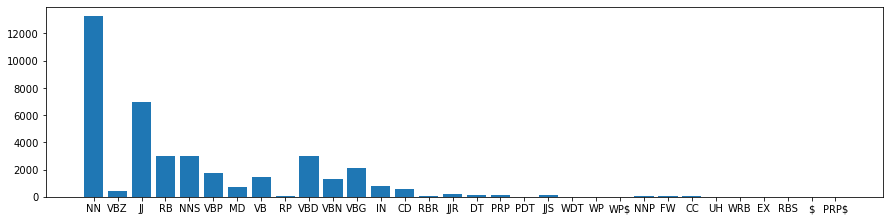

In [103]:
dist2=get_count(res2)
print("Number of tags used in T2=",len(dist2))
dist2
FrequencyPlot(dist2)